<a href="https://colab.research.google.com/github/SiddhiDabholkar10/Breast-Cancer-Image-Classification/blob/master/Breast_Cancer_Classification_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
from keras import models,layers

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL_SIZE=3
EPOCH=50

In [ ]:
PATH='/content/drive/MyDrive/Deep Learning /BreaKHis_dataset'
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1687 files belonging to 2 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Benign', 'Malignant']

In [ ]:
len(dataset)    #every element in the dataset is a batch of 32 images

53

In [ ]:
53*32

1696

In [ ]:
for image_batch,label_batch in dataset.take(1):              #gives one batch
  print(image_batch.shape)
  print(label_batch.numpy())    #tensor to numpy



(32, 256, 256, 3)
[1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1]


In [ ]:
#32 batch size
#256*256 dimension
#rgb  - 3 

In [ ]:
#to print first image
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[202.9375   196.9375   199.62854 ]
  [210.32532  203.92688  209.1222  ]
  [205.93958  200.67188  206.00677 ]
  ...
  [200.21094  182.20312  190.53906 ]
  [197.92377  181.72064  187.3222  ]
  [194.77948  183.9123   192.0451  ]]

 [[201.625    195.30438  197.19751 ]
  [205.61658  198.61658  205.61658 ]
  [202.1156   195.1156   202.2453  ]
  ...
  [194.60785  177.73755  183.34845 ]
  [197.28876  181.08563  186.6872  ]
  [195.59125  184.69812  192.69812 ]]

 [[196.4776   191.46979  195.45416 ]
  [196.38599  186.40942  194.99847 ]
  [188.70569  181.70569  189.04419 ]
  ...
  [190.68225  175.01294  178.68744 ]
  [195.40314  179.20001  184.80157 ]
  [193.12604  181.99426  190.25781 ]]

 ...

 [[207.82501  199.21667  202.11981 ]
  [210.58752  193.97656  208.0047  ]
  [187.32025  167.99213  191.70044 ]
  ...
  [166.66925  152.3385   184.34381 ]
  [150.20312  136.20312  169.21875 ]
  [130.12396  121.12396  149.87189 ]]

 [[212.1225   202.65375  212.21594 ]
  [216.7425   198.61719  2

In [ ]:
#in numpy
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)
  print(image_batch[0].numpy())


(256, 256, 3)
[[[153.1502    28.823853  99.56604 ]
  [166.36188   24.       112.166565]
  [167.87134   27.871338 115.27551 ]
  ...
  [232.53699  215.52917  217.13281 ]
  [233.60156  214.60156  216.60156 ]
  [225.79688  210.37146  215.9826  ]]

 [[152.08093   27.50531   96.91156 ]
  [165.59375   22.390625 108.83655 ]
  [170.07178   30.331177 116.20148 ]
  ...
  [234.47028  214.7984   217.80621 ]
  [232.82874  213.43811  216.66528 ]
  [226.1925   209.43219  215.98157 ]]

 [[151.67969   26.6698    93.9599  ]
  [164.22656   21.023438 105.6344  ]
  [177.9845    36.994934 123.65637 ]
  ...
  [233.67188  212.6745   216.01562 ]
  [234.0047   213.0047   218.0047  ]
  [225.39374  208.52655  216.79218 ]]

 ...

 [[251.79321  227.33801  233.2052  ]
  [252.79688  218.8078   235.40002 ]
  [250.02338  212.04681  235.70563 ]
  ...
  [115.3515    25.002502 130.34625 ]
  [112.592224  22.578186 130.7688  ]
  [100.211975  29.789062 128.44165 ]]

 [[250.01532  228.1925   231.64563 ]
  [254.5697   223.57751

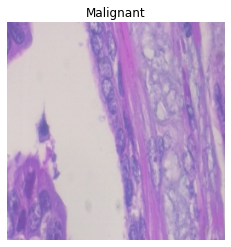

In [ ]:
#to see the first image 
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")
  
  


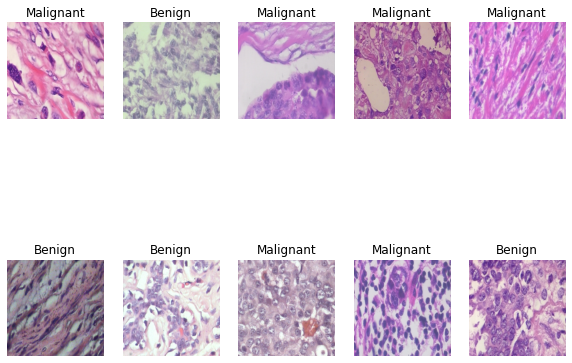

In [ ]:
#to display first 10 images
plt.figure(figsize=(10,8))
for image_batch, label_batch in dataset.take(1):
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")



In [ ]:
len(dataset)

53

In [ ]:
#80% training  
#20% => 10% validation, 10% test

In [ ]:
train_size=0.8
len(dataset)*train_size

42.400000000000006

In [ ]:
train_dataset = dataset.take(42)
len(train_dataset)

42

In [ ]:
test_dataset = dataset.skip(42)
len(test_dataset)

11

In [ ]:
validation_size = 0.1
len(dataset)*validation_size


5.300000000000001

In [ ]:
validation_dataset = test_dataset.take(5)

In [ ]:
len(validation_dataset)

5

In [ ]:
test_dataset = test_dataset.skip(5)
len(test_dataset)


6

In [ ]:
def get_dataset_partitions_tf(ds, train_split= 0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):   
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_dataset, validation_dataset , test_dataset = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_dataset)

42

In [ ]:
len(validation_dataset)

5

In [ ]:
len(test_dataset)

6

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

Preprocessing

In [ ]:
#Resizing, Rescaling

resize_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#Data augmentation to address overfitting
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),                                    
])


In [ ]:
INPUT_SHAPE = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL_SIZE)
n_classes = 2
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = "relu" , input_shape = INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),   
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes,activation = "softmax"),

])
model.build(input_shape = INPUT_SHAPE)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs = EPOCH,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = validation_dataset

)

Epoch 1/50
42/42 [==============================] - 45s 591ms/step - loss: 0.6185 - accuracy: 0.6689 - val_loss: 0.6824 - val_accuracy: 0.5437
Epoch 2/50
42/42 [==============================] - 6s 137ms/step - loss: 0.6495 - accuracy: 0.6787 - val_loss: 0.6645 - val_accuracy: 0.7125
Epoch 3/50
42/42 [==============================] - 6s 137ms/step - loss: 0.5804 - accuracy: 0.6899 - val_loss: 0.5428 - val_accuracy: 0.7625
Epoch 4/50
42/42 [==============================] - 6s 136ms/step - loss: 0.5636 - accuracy: 0.7288 - val_loss: 0.4840 - val_accuracy: 0.7688
Epoch 5/50
42/42 [==============================] - 6s 136ms/step - loss: 0.4676 - accuracy: 0.8180 - val_loss: 0.5454 - val_accuracy: 0.7500
Epoch 6/50
42/42 [==============================] - 6s 136ms/step - loss: 0.4639 - accuracy: 0.8127 - val_loss: 0.4607 - val_accuracy: 0.8062
Epoch 7/50
42/42 [==============================] - 6s 136ms/step - loss: 0.4888 - accuracy: 0.7903 - val_loss: 0.4537 - val_accuracy: 0.8125
Epoch

In [ ]:
scores = model.evaluate(test_dataset)

6/6 [==============================] - 18s 64ms/step - loss: 0.3580 - accuracy: 0.8594


In [ ]:
scores

[0.3579663336277008, 0.859375]

In [ ]:
history.params

{'epochs': 50, 'steps': 42, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.6689138412475586,
 0.6786516904830933,
 0.6898876428604126,
 0.7288389801979065,
 0.8179775476455688,
 0.812734067440033,
 0.7902621626853943,
 0.8224719166755676,
 0.8029962778091431,
 0.8179775476455688,
 0.8479400873184204,
 0.8659176230430603,
 0.8209737539291382,
 0.8374531865119934,
 0.8374531865119934,
 0.8434457182884216,
 0.8561797738075256,
 0.8636704087257385,
 0.8352059721946716,
 0.8644194602966309,
 0.8539325594902039,
 0.8584269881248474,
 0.8659176230430603,
 0.8749063611030579,
 0.8666666746139526,
 0.8621723055839539,
 0.8749063611030579,
 0.8696629405021667,
 0.8711610436439514,
 0.8726591467857361,
 0.8823969960212708,
 0.8696629405021667,
 0.8861423134803772,
 0.877902626991272,
 0.8599250912666321,
 0.8801498413085938,
 0.8816479444503784,
 0.8704119920730591,
 0.888389527797699,
 0.8853932619094849,
 0.8711610436439514,
 0.8876404762268066,
 0.8816479444503784,
 0.8823969960212708,
 0.890636682510376,
 0.8741573095321655,
 0.8823969960212708,
 0.87865167856216

In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 

loss = history.history['loss']
val_loss = history.history['val_loss']

First image for prediction-->
First image's actual label Malignant
predicted label:  Malignant


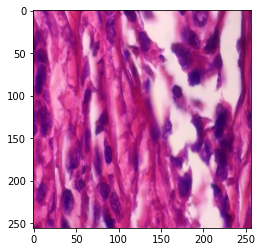

In [ ]:
for images_batch,labels_batch in test_dataset.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image for prediction-->")
  plt.imshow(first_image)
  print("First image's actual label",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
model.save("breast_cancer_classifier.h5")

In [ ]:
model

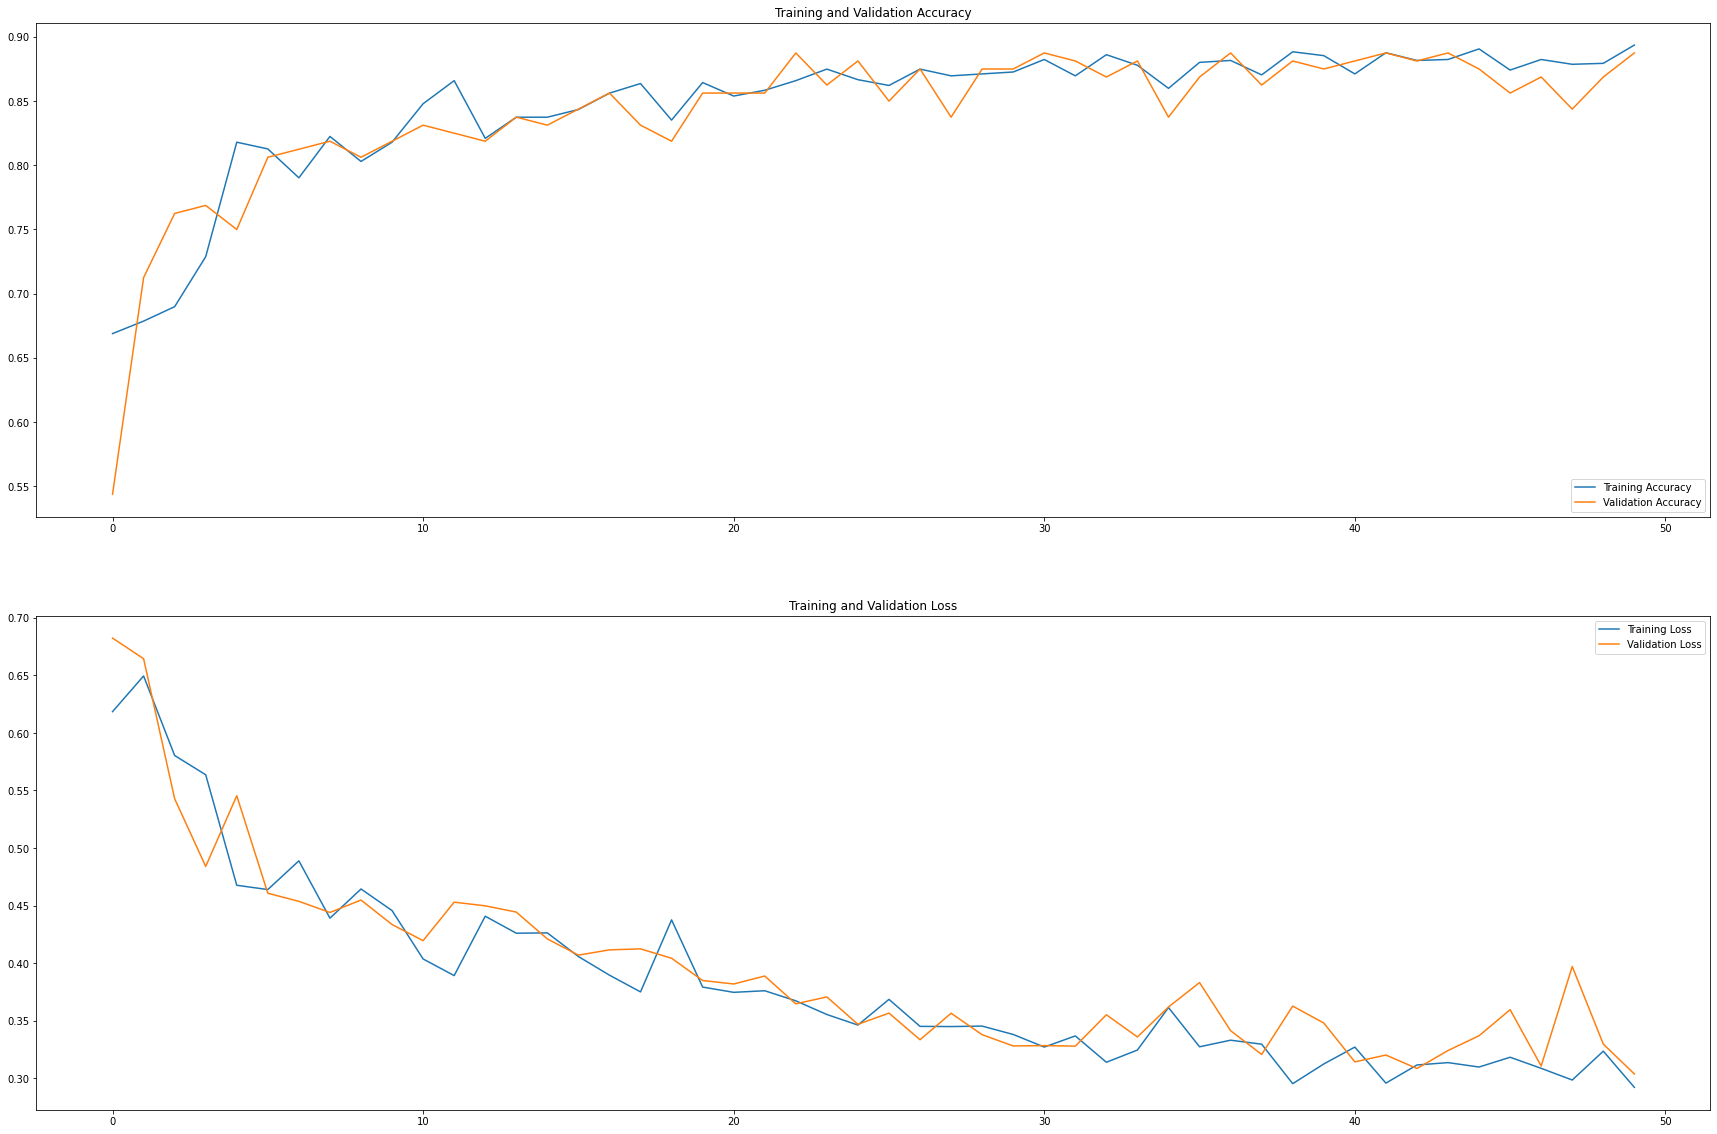

In [ ]:
EPOCHS = 50

plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

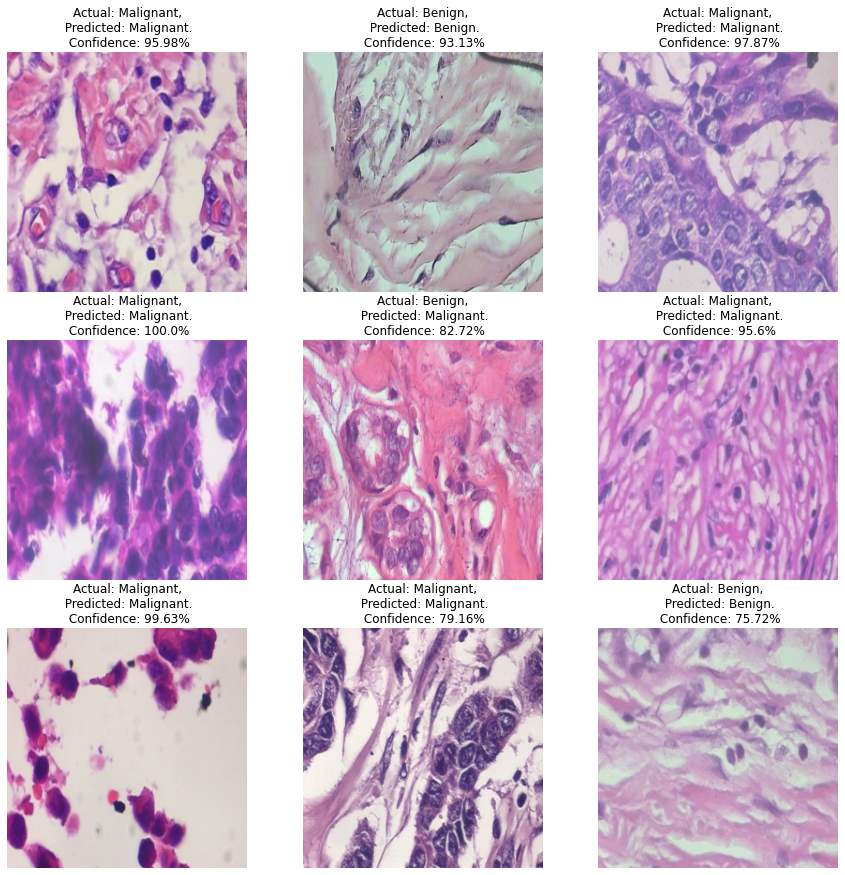

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")